<a href="https://colab.research.google.com/github/yahicoS/ModelosLivro/blob/main/ExerciciosLivro10_3_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercício 10.3.1

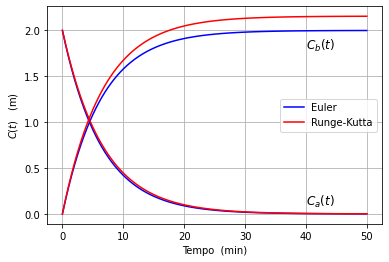

In [ ]:
#versão 2 de teste
import numpy as np
import matplotlib.pyplot as plt

# Dados de Entrada
k = 0.15 #                 [min^(-1)]
Ca0 = 2 #mol/L
Cb0 = 0 

#definindo função y' = f(t,y) neste caso Ca' = f(Ca) e Cb' = f(Ca)
def f(escolha,Ca):
  if escolha == 1:
    y = -k * Ca 
  elif escolha == 2:
    y = k * Ca 
  return y




#Definicões de passos e parâmetros para simulação
n = 100 #número de passos
tf = 50 #valor final de simulação
h = tf/n #tamanho do passo
t = np.linspace(0,tf,n+1) #Criando um vetor tempo até tf, com intervalos h




#Cálculo por Euler
CaEuler = (n + 1) * [0] #criando o vetor Concentração de A (Ca) com dimensão n + 1
CbEuler = (n + 1) * [0] #criando o vetor Concentração de A (Ca) com dimensão n + 1
CaEuler[0] = Ca0 # atribuidando o valor para o tempo zero (Condição Inicial)
CbEuler[0] = Cb0
for i in range(1,n+1):
  CaEuler[i] = CaEuler[i-1] + f(1,CaEuler[i-1]) * h
  CbEuler[i] = CbEuler[i-1] + f(2,CaEuler[i-1]) * h
  

#Cálculo por Runge-Kutta
CaRK4 = (n + 1) * [0] #criando o vetor altura com dimensão n + 1
CbRK4 = (n + 1) * [0] #criando o vetor altura com dimensão n + 1
CaRK4[0] = Ca0 # atribuidando o valor para o tempo zero (Condição Inicial)
CbRK4[0] = Cb0 # atribuidando o valor para o tempo zero (Condição Inicial)
K1, K2, K3, K4 = 2 * [0], 2 * [0], 2 * [0], 2 * [0]
for i in range(1,n+1):
  for j in range (0,2):

    #Cálculo das constantes do método de Runge-Kutta (K1,K2,K3,K4)
    if j == 0:
      K1[j] = f(1,CaRK4[i-1])
      K2[j] = f(1,CaRK4[i-1]+(h * K1[j])/2)
      K3[j] = f(1,CaRK4[i-1]+(h * K2[j])/2)
      K4[j] = f(1,CaRK4[i-1]+ h * K3[j])
      CaRK4[i] = CaRK4[i-1] + h/6 *(K1[j] + 2*K2[j] + 2*K3[j] + K4[j])
    elif j == 1:
      K1[j] = f(2,CaRK4[i-1])
      K2[j] = f(2,CaRK4[i-1]+(h * K1[j])/2)
      K3[j] = f(2,CaRK4[i-1]+(h * K2[j])/2)
      K4[j] = f(2,CaRK4[i-1]+ h * K3[j])
      CbRK4[i] = CbRK4[i-1] + h/6 *(K1[j] + 2*K2[j] + 2*K3[j] + K4[j])


#Graficando as soluções pelos métodos de Euler e Runge-Kutta de quarta ordem





figure = plt.plot()
plt.plot(t,CaEuler,label=f"Euler",color = "blue")
plt.plot(t,CbEuler,color="blue")
plt.plot(t,CaRK4,label=f"Runge-Kutta",color = "red")
plt.plot(t,CbRK4,color="red")
plt.xlabel(r'Tempo  (min)', fontsize = 'medium')
plt.ylabel(r'$C(t)$   ($\mathrm{m}}$)', fontsize = 'medium')
plt.text(40, 0.1, '$C_a (t)$', fontsize = 12)
plt.text(40, 1.8, '$C_b (t)$', fontsize = 12)
plt.legend()
plt.grid()
plt.savefig('Metodos.pdf',bbox_inches = 'tight')
plt.show()

In [ ]:
#solução pacotes prontos
def ode(x,t):
  y = 2 * [0] 
  y[0] = - k * x[0]
  y[1] = k * x[0]
  return y

x = odeint(ode,h0,t)

A = x[:,0]
B = x[:,1]